In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("BMW sales data (2010-2024) (1).csv")
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [4]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [5]:
df.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dtypes

Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object

In [8]:
df["Car_Age"] = 2024 - df["Year"]
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,8
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,11
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,2
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,0
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High,10
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High,1
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High,14
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High,4


In [9]:
def price_outlier(df):
    Q1 = df['Price_USD'].quantile(0.25)
    Q3 = df['Price_USD'].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df['Price_USD'] < lower) | (df['Price_USD'] > upper)]
    return outliers


In [10]:
price_outlier(df)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age


In [11]:
def Sales_outlier(df):
    Q1=df['Sales_Volume'].quantile(0.25)
    Q3=df['Sales_Volume'].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR

    outlier=df[(df['Sales_Volume']<lower) | (df['Sales_Volume']> upper) ]
    return outlier

In [12]:
Sales_outlier(df)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age


In [13]:
def Engine_Size_outlier(df):
    Q1 = df['Engine_Size_L'].quantile(0.25)
    Q3 = df['Engine_Size_L'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier = df[(df['Engine_Size_L'] < lower) | (df['Engine_Size_L'] > upper)]

    return outlier


Engine_Size_outlier(df)
    

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age


In [14]:
def Mileage_KM_outlier(df):
    Q1 = df['Mileage_KM'].quantile(0.25)
    Q3 = df['Mileage_KM'].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier = df[(df['Mileage_KM'] < lower) | (df['Mileage_KM'] > upper)]
    return outlier

Mileage_KM_outlier(df)


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age


In [15]:
model_per_sales=df.groupby("Model")["Sales_Volume"].size().sort_values()
model_per_sales=model_per_sales.sort_values(ascending=True)
model_per_sales

Model
M3          4413
M5          4478
X6          4478
X5          4487
X3          4497
X1          4570
5 Series    4592
3 Series    4595
i8          4606
i3          4618
7 Series    4666
Name: Sales_Volume, dtype: int64

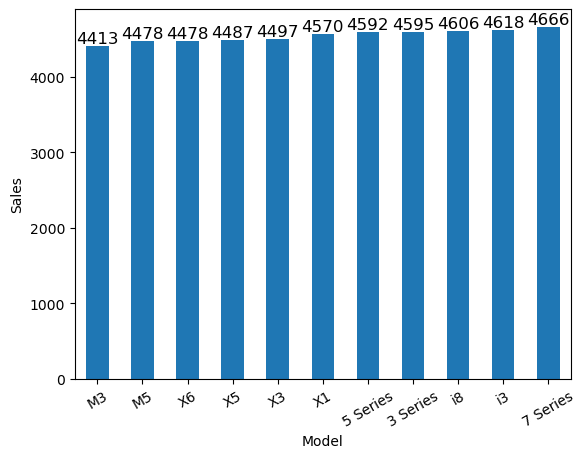

In [16]:
ax = model_per_sales.plot(
    kind='bar',rot=30,
    xlabel='Model',ylabel='Sales'
)

for i, v in enumerate(model_per_sales):
    ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)


<Axes: ylabel='Sales_Volume'>

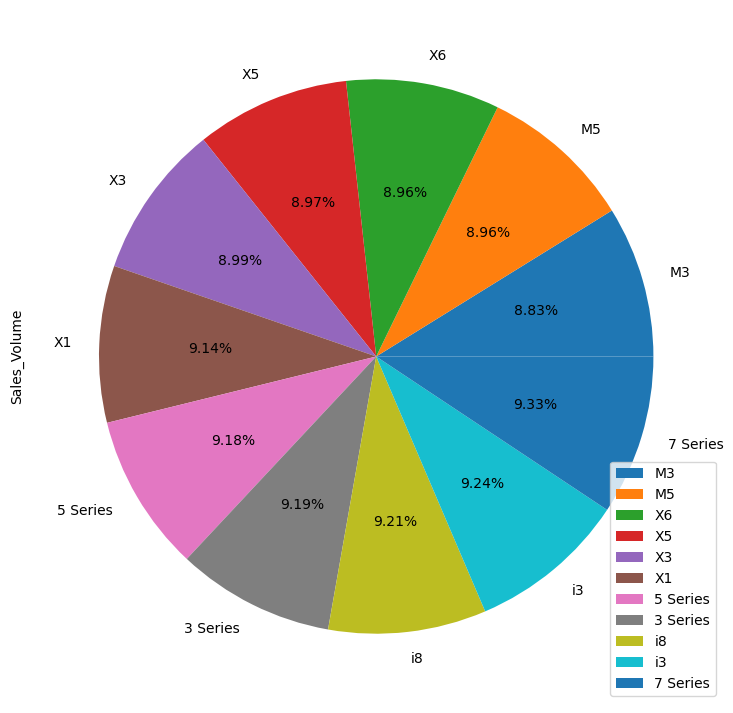

In [17]:
model_per_sales.plot(kind='pie',legend=True,autopct='%1.2f%%',figsize=(12,9))

In [18]:
sales_per_region=df.groupby('Region')['Sales_Volume'].sum()
sales_per_region=sales_per_region.sort_values(ascending=True)
sales_per_region

Region
South America    41551818
Africa           41565252
Middle East      42326620
North America    42402629
Europe           42555138
Asia             42974277
Name: Sales_Volume, dtype: int64

<Axes: ylabel='Sales_Volume'>

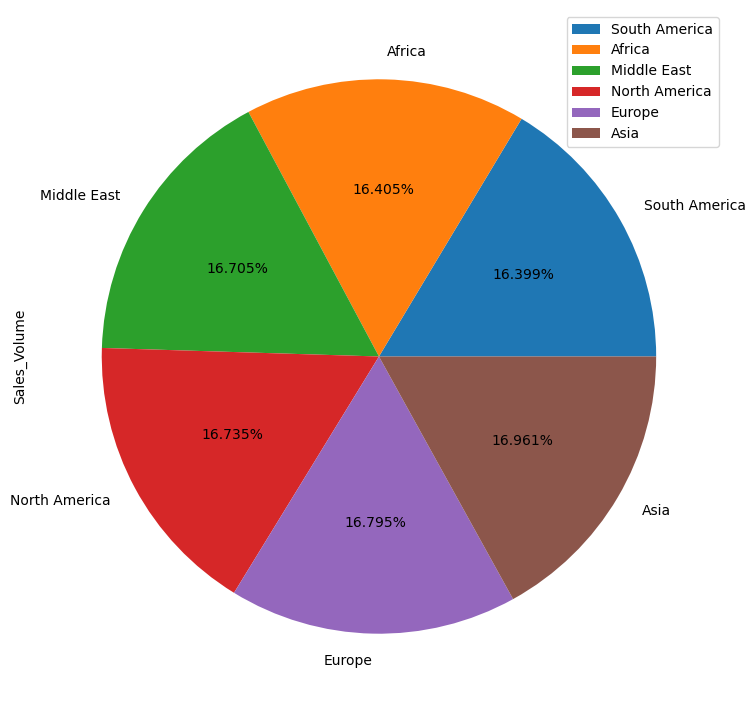

In [19]:
sales_per_region.plot(kind='pie',autopct='%1.3f%%',legend=True,figsize=(12,9))

In [20]:
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,8
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,11
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,2
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,0
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,4
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High,10
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High,1
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High,14
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High,4


In [21]:
manual_transmission=df[df.Transmission=='Manual']
manual_transmission

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High,8
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low,4
5,5 Series,2017,Middle East,Silver,Diesel,Manual,1.9,171362,42926,1232,Low,7
6,i8,2022,Europe,White,Diesel,Manual,1.8,196741,55064,7949,High,2
9,i8,2019,Europe,White,Electric,Manual,3.0,35700,96257,4411,Low,5
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,5 Series,2013,Europe,Grey,Petrol,Manual,4.7,155013,80263,3700,Low,11
49994,5 Series,2010,North America,Silver,Petrol,Manual,3.6,56672,32990,1575,Low,14
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High,10
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High,1


In [22]:
automatic_transmission=df[df.Transmission=='Automatic']
automatic_transmission

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Car_Age
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low,11
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low,2
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low,0
7,M5,2014,Asia,Black,Diesel,Automatic,1.6,121156,102778,632,Low,10
8,X3,2016,South America,White,Diesel,Automatic,1.7,48073,116482,8944,High,8
...,...,...,...,...,...,...,...,...,...,...,...,...
49990,3 Series,2016,North America,Grey,Petrol,Automatic,3.7,199549,73173,9181,High,8
49991,X5,2019,Asia,White,Diesel,Automatic,3.3,162639,33217,1904,Low,5
49992,i3,2017,Middle East,Blue,Petrol,Automatic,3.9,79874,115046,9015,High,7
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High,14


In [23]:
unique_region=df['Region'].unique()
unique_region

array(['Asia', 'North America', 'Middle East', 'South America', 'Europe',
       'Africa'], dtype=object)

In [24]:
color_filter=df.groupby('Color').size()
color_filter=color_filter.sort_values(ascending=True)
color_filter

Color
Blue      8262
Black     8273
White     8304
Grey      8348
Silver    8350
Red       8463
dtype: int64

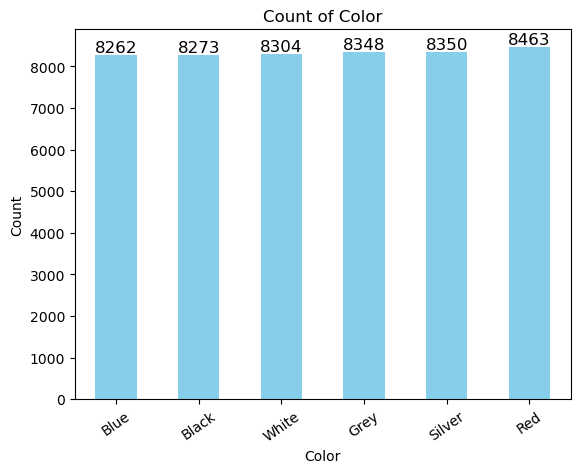

In [25]:
ax = color_filter.plot(
    kind='bar',
    rot=35,
    xlabel='Color',
    ylabel='Count',
    title='Count of Color',
    color='skyblue'
)

for i, v in enumerate(color_filter):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)


In [26]:
fuel_type=df.groupby("Fuel_Type").size()
fuel_type=fuel_type.sort_values(ascending=True)
fuel_type

Fuel_Type
Diesel      12263
Electric    12471
Petrol      12550
Hybrid      12716
dtype: int64

In [27]:
sales_classification=df.groupby('Sales_Classification').size()
sales_classification=sales_classification.sort_values(ascending=True)
sales_classification

Sales_Classification
High    15246
Low     34754
dtype: int64

In [28]:
transmission=df.groupby('Transmission').size()
transmission=transmission.sort_values(ascending=True)
transmission

Transmission
Automatic    24846
Manual       25154
dtype: int64

In [29]:
regin=df.groupby('Region').size()
regin=regin.sort_values(ascending=True)
regin

Region
South America    8251
Africa           8253
Europe           8334
North America    8335
Middle East      8373
Asia             8454
dtype: int64

<Axes: >

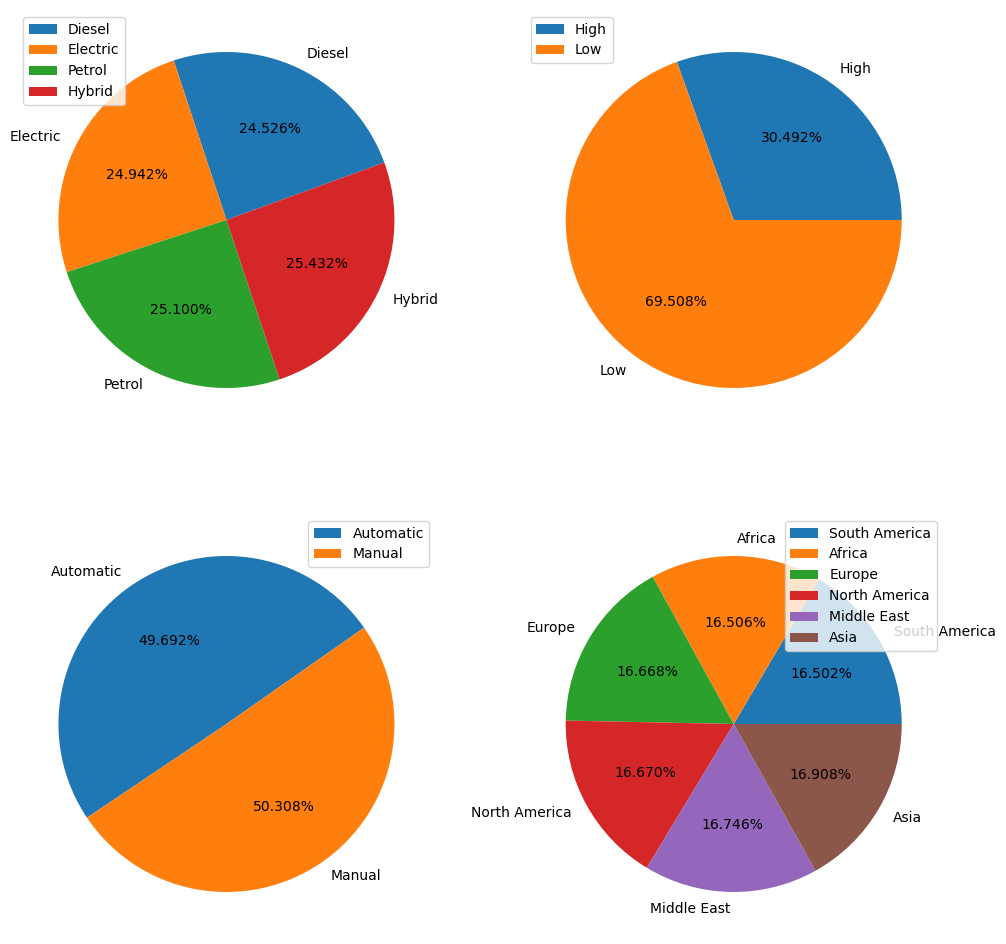

In [30]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
fuel_type.plot(kind='pie',legend=True,autopct='%1.3f%%',figsize=(12,12),startangle=20)
plt.subplot(2,2,2)
sales_classification.plot(kind='pie',legend=True,autopct='%1.3f%%',figsize=(12,12))
plt.subplot(2,2,3)
transmission.plot(kind='pie',legend=True,autopct='%1.3f%%',figsize=(12,12),startangle=35)
plt.subplot(2,2,4)
regin.plot(kind='pie',legend=True,autopct='%1.3f%%',figsize=(12,12))

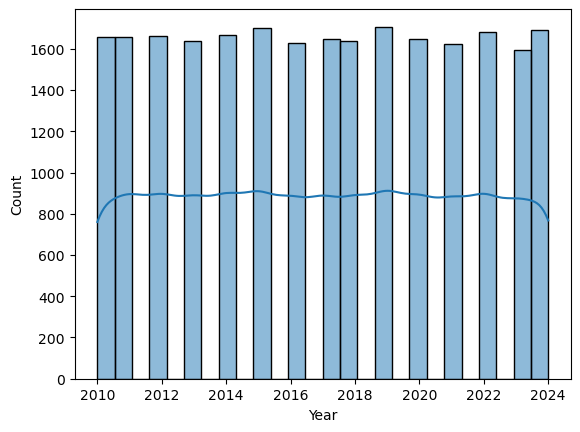

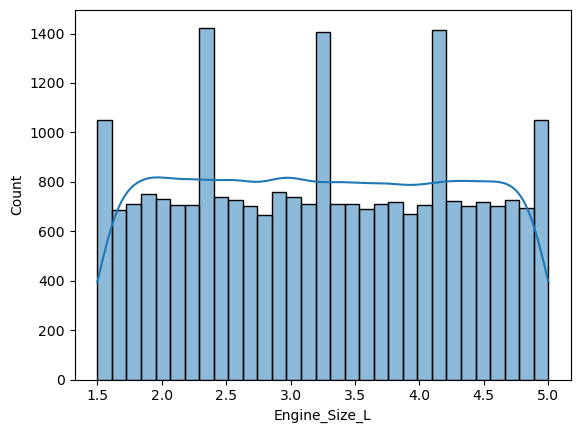

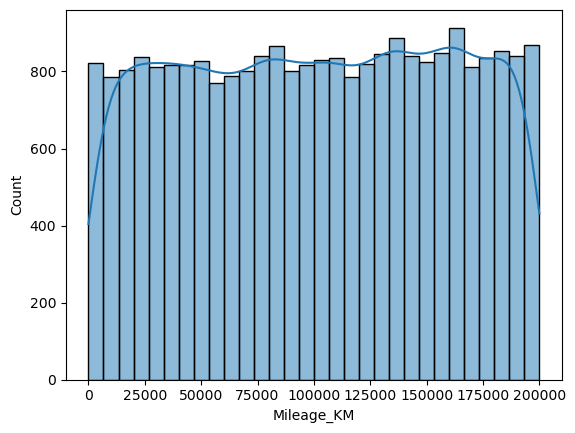

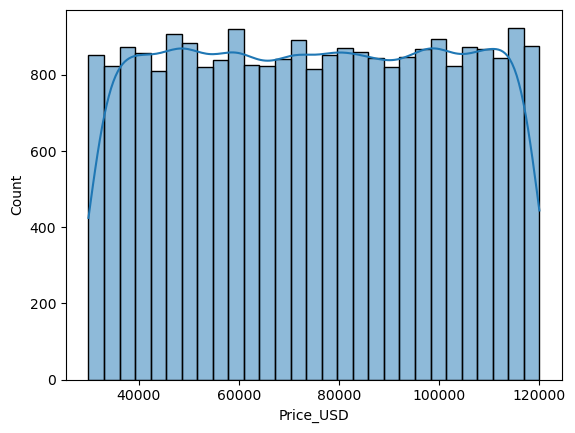

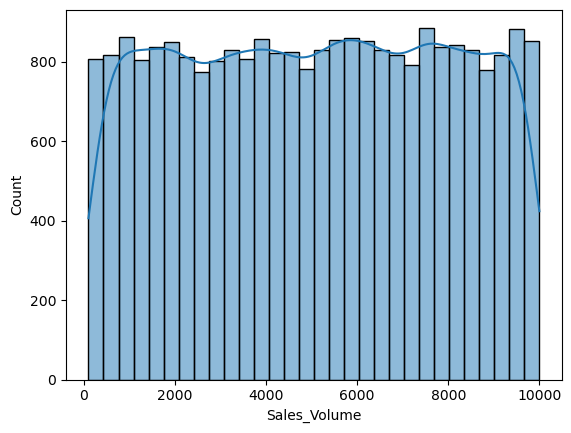

In [31]:
cols=['Year','Engine_Size_L','Mileage_KM','Price_USD','Sales_Volume']

for col in cols:
    plt.figure()
    sns.histplot(automatic_transmission[col],kde=True),
    plt.show()

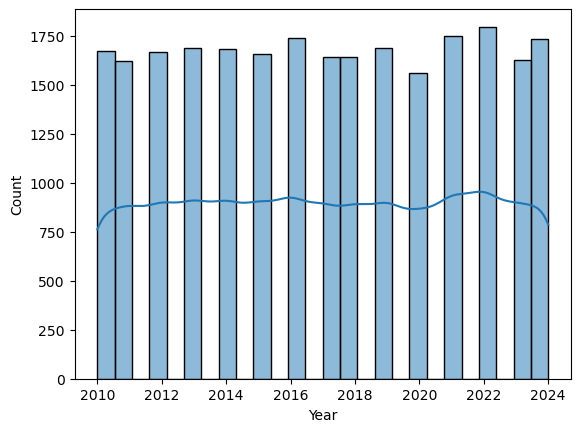

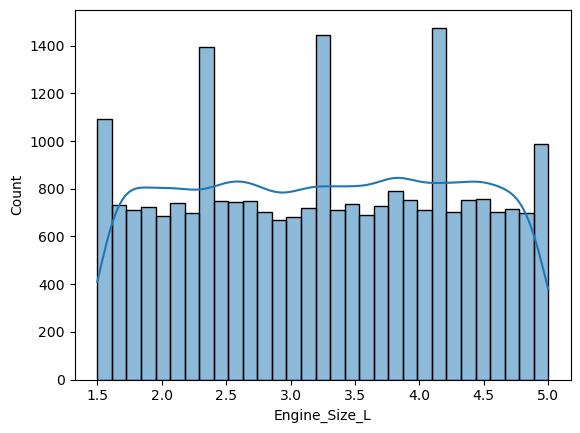

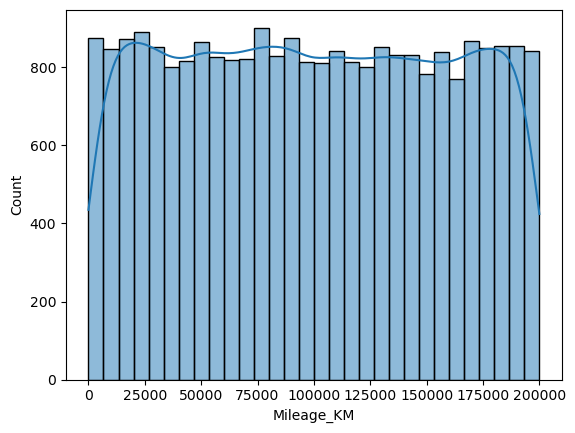

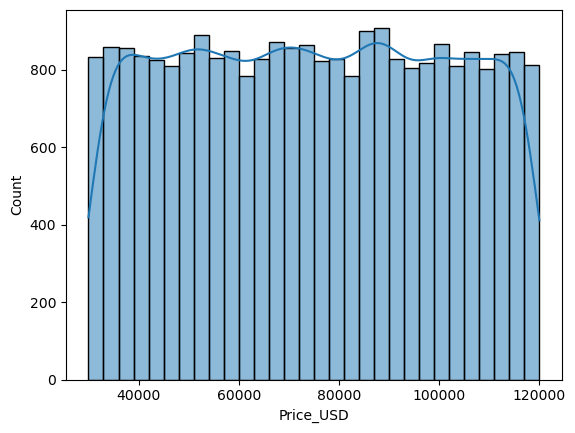

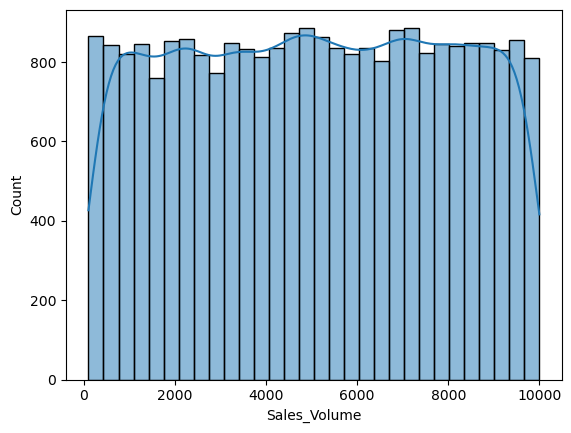

In [32]:
cols=['Year','Engine_Size_L','Mileage_KM','Price_USD','Sales_Volume']

for col in cols:
    plt.figure()
    sns.histplot(manual_transmission[col],kde=True),
    plt.show()

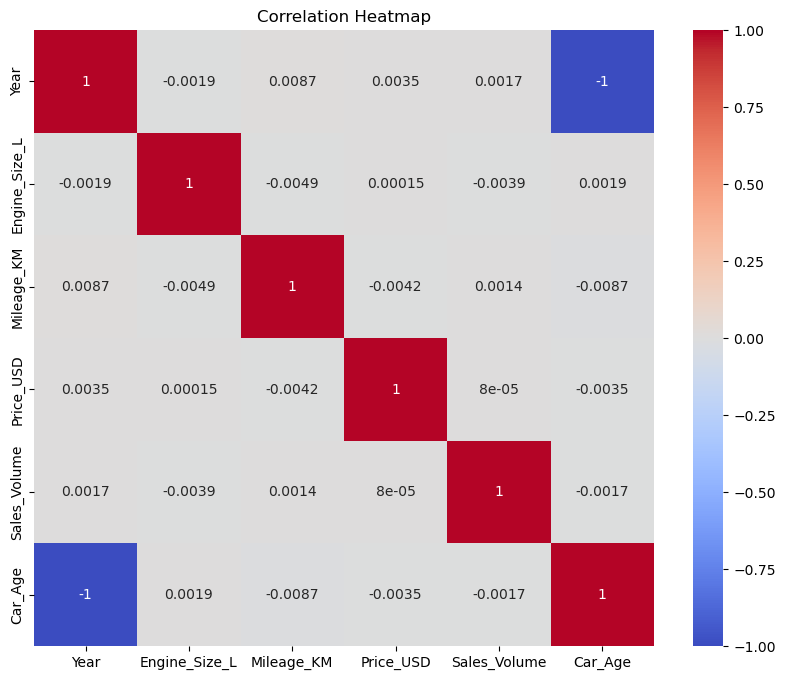

In [33]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm"
)

plt.title("Correlation Heatmap")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '5 Series'),
  Text(1, 0, 'i8'),
  Text(2, 0, 'X3'),
  Text(3, 0, '7 Series'),
  Text(4, 0, 'M5'),
  Text(5, 0, '3 Series'),
  Text(6, 0, 'X1'),
  Text(7, 0, 'M3'),
  Text(8, 0, 'X5'),
  Text(9, 0, 'i3'),
  Text(10, 0, 'X6')])

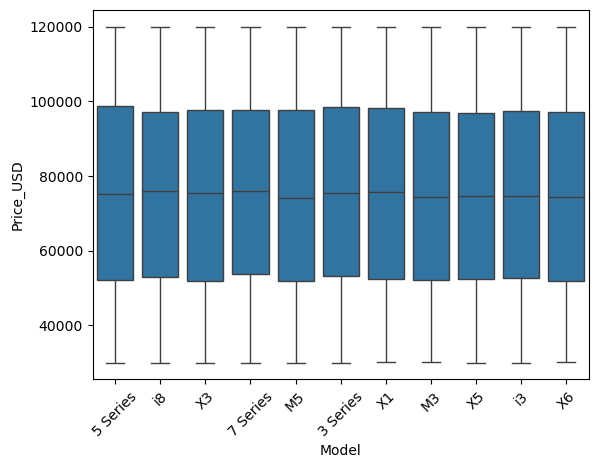

In [34]:
sns.boxplot(data=df,x='Model', y='Price_USD')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Middle East'),
  Text(3, 0, 'South America'),
  Text(4, 0, 'Europe'),
  Text(5, 0, 'Africa')])

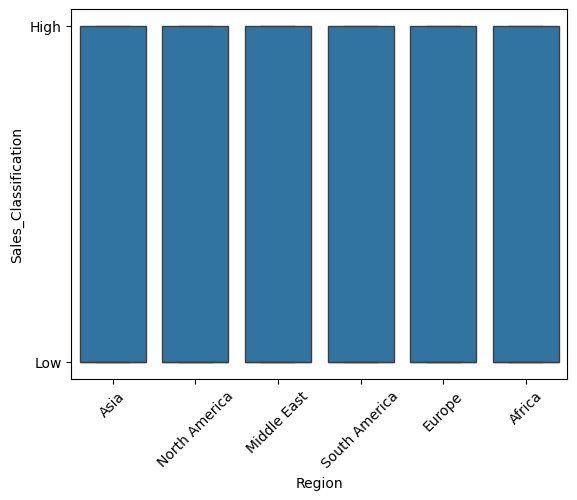

In [35]:
sns.boxplot(data=df,y='Sales_Classification',x='Region')
plt.xticks(rotation=45)

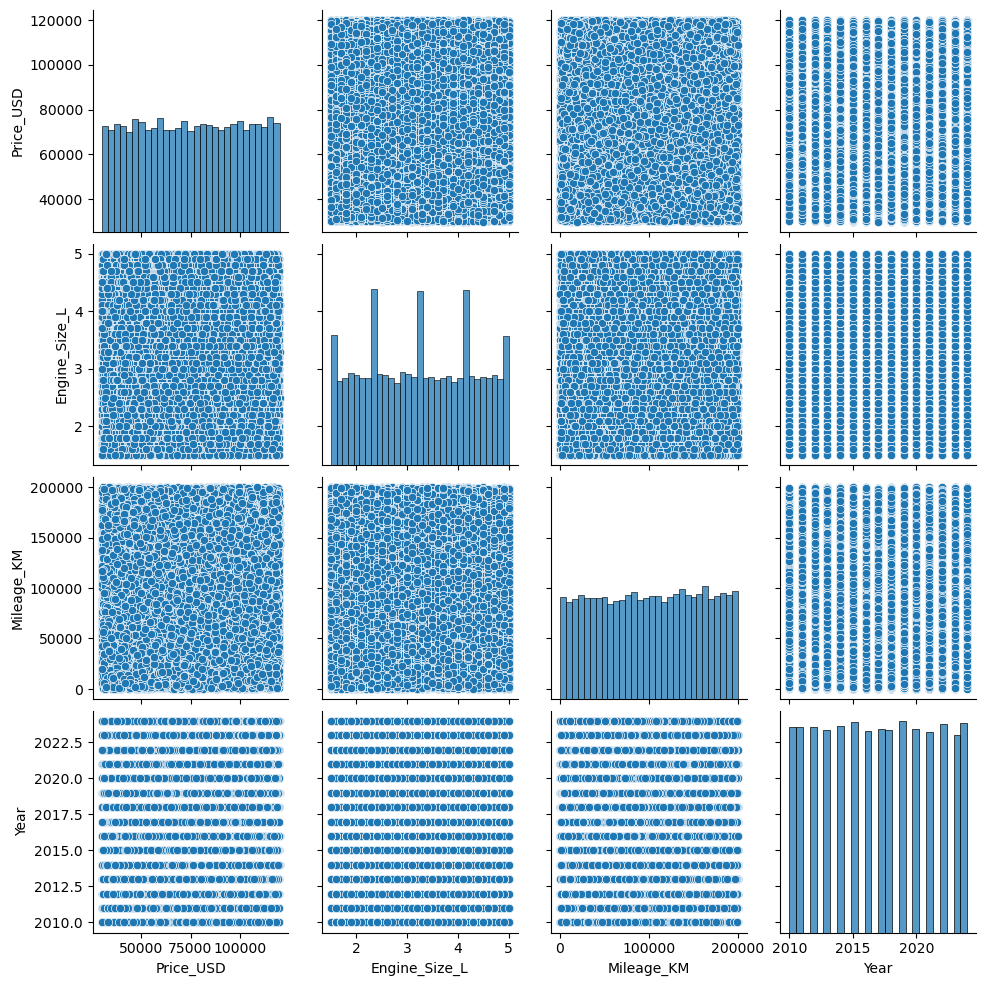

In [36]:
numeric_cols = ['Price_USD', 'Engine_Size_L', 'Mileage_KM', 'Year']  
sns.pairplot(automatic_transmission[numeric_cols])
plt.show()


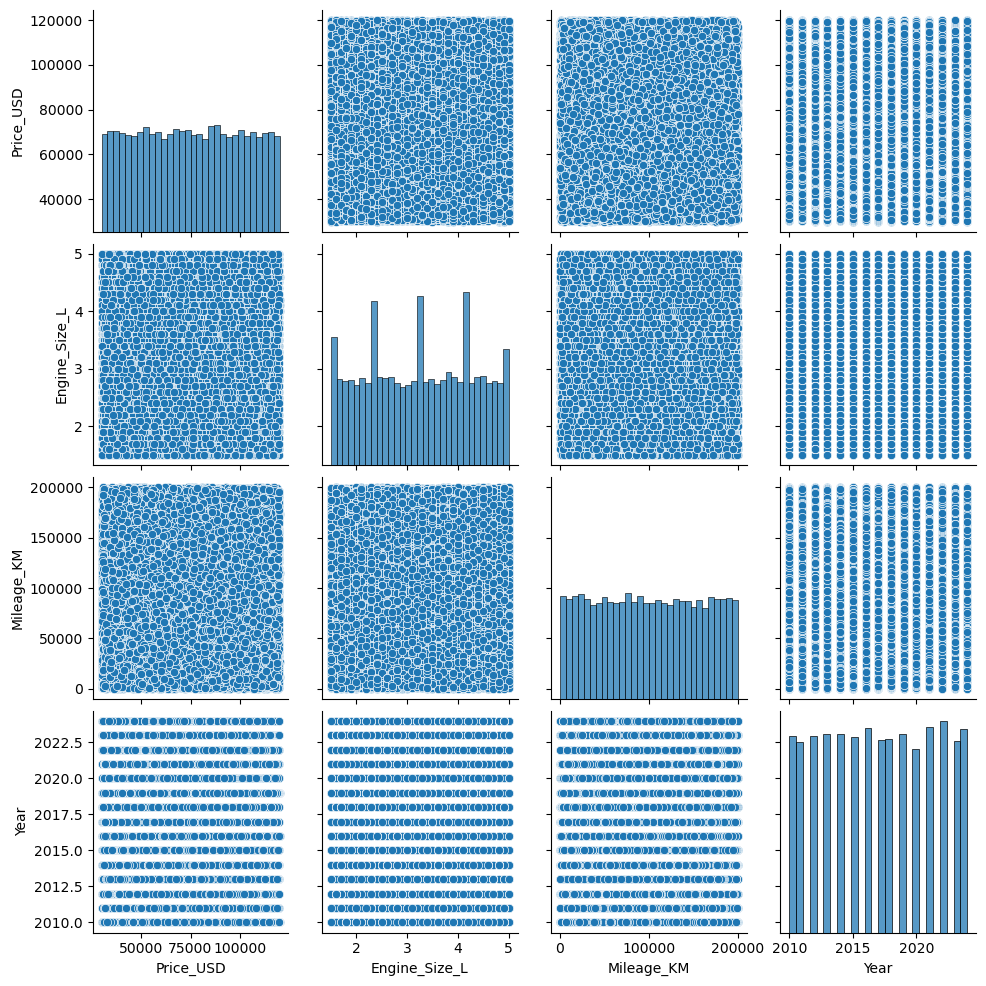

In [37]:
numeric_cols = ['Price_USD', 'Engine_Size_L', 'Mileage_KM', 'Year']  
sns.pairplot(manual_transmission[numeric_cols])
plt.show()


([0, 1, 2, 3],
 [Text(0, 0, 'Petrol'),
  Text(1, 0, 'Hybrid'),
  Text(2, 0, 'Diesel'),
  Text(3, 0, 'Electric')])

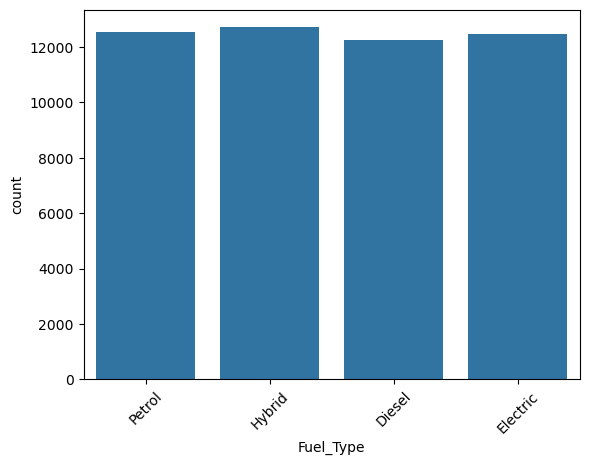

In [38]:
sns.countplot(data=df,x='Fuel_Type')
plt.xticks(rotation=45)